# Dataset-Mental-Disorders


La segunda práctica consiste en seleccionar un Dataset de interés (se puede elegir el dataset de la práctica 1), y aplicar al menos tres técnicas de los siguientes tipos de procesamiento:
1. Limpieza de datos
2. Aumento de datos
3. Extracción de características
4. Reducción de dimensionalidad
5. Selección de características

Por ejemplo, eliminación de datos incompletos (limpieza de datos), PCA (reducción de dimensionalidad), y ganancia de información (selección de atributos). Sobra decir que se requiere realizar un análisis exploratorio de los datos.


In [1]:
cd

C:\Users\Jesus


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
cd Downloads/icd2024Gortarez/practices

C:\Users\Jesus\Downloads\icd2024Gortarez\practices


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Acerca del conjunto de datos: Una colección de 120 pacientes de psicología con 17 síntomas esenciales para diagnosticar trastorno bipolar maniaco, trastorno bipolar depresivo, trastorno depresivo mayor y personas normales.

El conjunto de datos contiene los 17 síntomas esenciales que los psiquiatras utilizan para diagnosticar los trastornos descritos. Los síntomas conductuales incluyen los niveles de tristeza, agotamiento, euforia, trastornos del sueño, cambios de humor, pensamientos suicidas, anorexia, ansiedad, intento de explicación, colapso nervioso, ignorar y seguir adelante, admitir errores, sobrepensar, respuesta agresiva, optimismo, actividad sexual y concentración en un formato de valores separados por comas (CSV).

La categoría "Normal" se refiere a las personas que utilizan el tiempo de terapia para asesoramiento especializado, desarrollo personal y enriquecimiento de habilidades para la vida. Aunque estas personas también pueden tener problemas mentales menores, se diferencian de aquellos que padecen trastorno depresivo mayor y trastorno bipolar.


Se buca analizar los datos y su relacion entre ellos de manera general.


## Visión general de los datos (Análisis)


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Practica 2 citrus.csv")

df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


**_Imprime un resumen del DataFrame, mostrando información sobre las columnas, el tipo de datos, y cuántos valores no nulos tiene cada una. Necesario para asegurarse de que la base de datos no caresca de algun dato._**


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None


**_Imprime estadísticas descriptivas para las columnas numéricas del DataFrame, como media, desviación estándar, y cuartiles._**


In [3]:
print(df.describe())

           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


**_Muestra la cantidad de valores faltantes (NaN) en cada columna del DataFrame._**


In [8]:
print(df.isna().sum())

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64


**_Imprime las dimensiones del DataFrame en forma de una tupla (número de filas, número de columnas)_**


In [5]:
print(df.shape)

(10000, 6)


**_Muestra el número de datos duplicados en caso de existir._**


In [25]:
df.duplicated().sum()

0

**_Muestra los datos y su relacion con su respectivo citrico._**

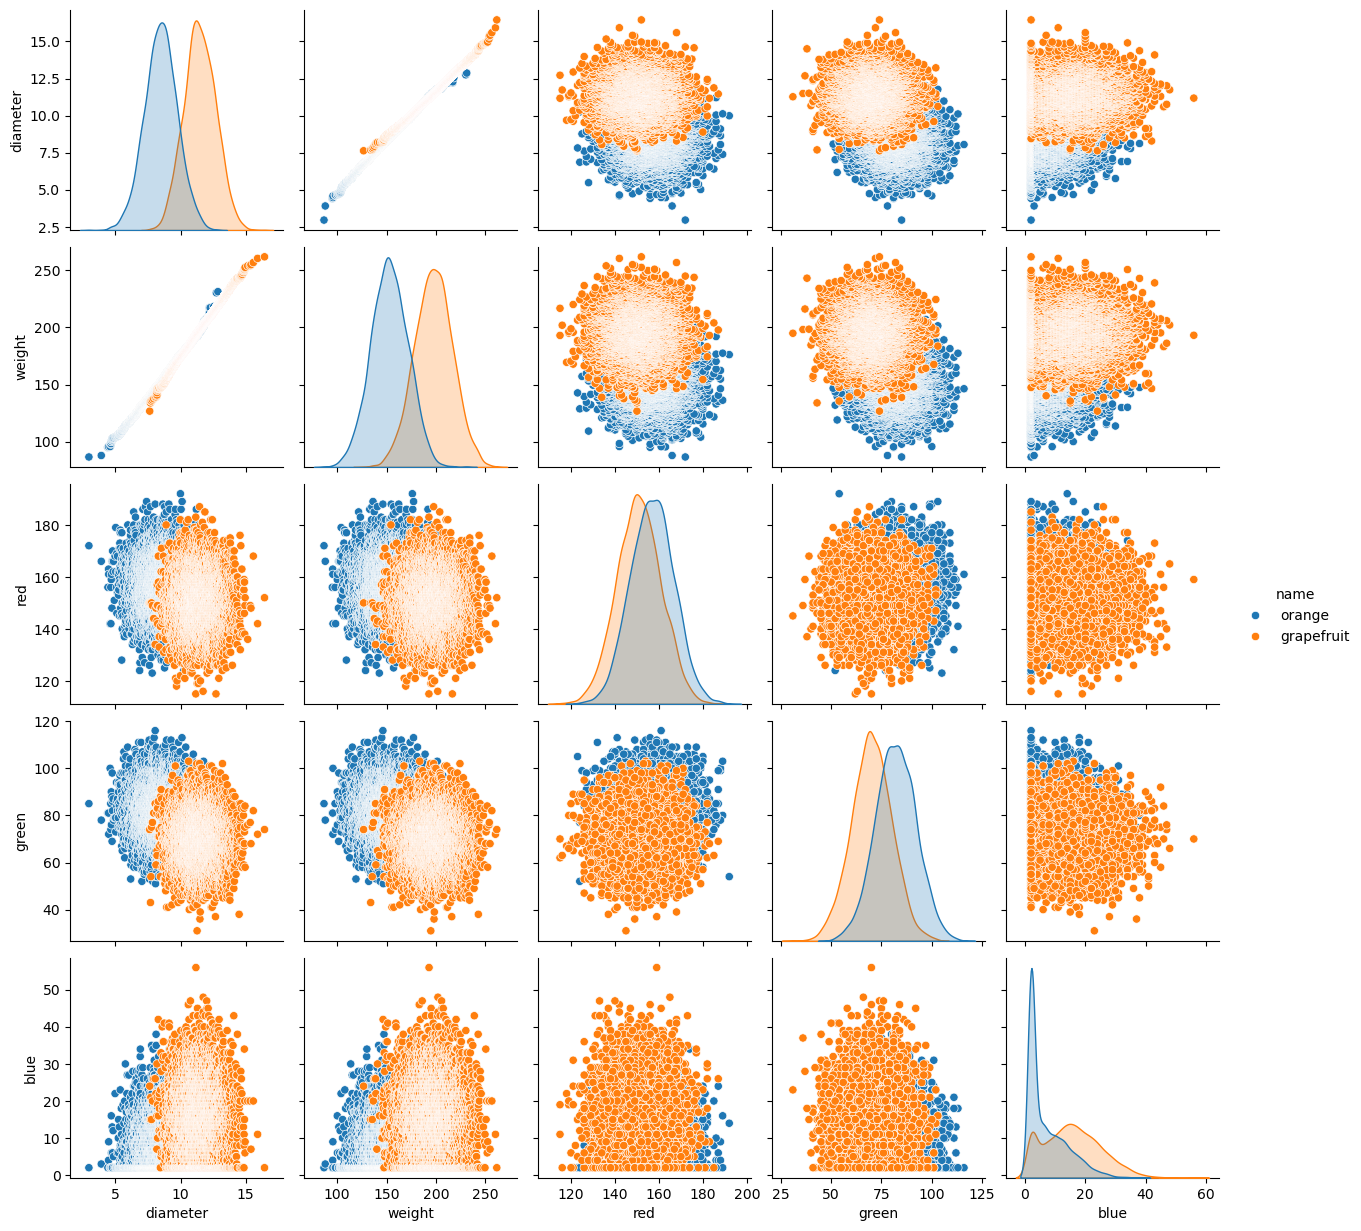

In [27]:
sns.pairplot(df, hue="name")

## Limpieza de datos


**_Muestra los nombres de las columnas y los datos que toman cada una de ellas._**


In [12]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,":",df[column_name].unique())
    
df.value_counts(normalize=True)

count = df.nunique()

name : ['orange' 'grapefruit']
diameter : [ 2.96  3.91  4.42  4.47  4.48  4.59  4.64  4.65  4.68  4.69  4.73  4.74
  4.75  4.77  4.78  4.82  4.85  4.91  4.97  5.02  5.08  5.1   5.11  5.15
  5.16  5.22  5.24  5.25  5.26  5.3   5.32  5.34  5.35  5.36  5.37  5.38
  5.4   5.43  5.45  5.47  5.48  5.49  5.51  5.52  5.53  5.57  5.58  5.59
  5.6   5.61  5.63  5.65  5.66  5.67  5.68  5.69  5.71  5.72  5.73  5.74
  5.76  5.77  5.79  5.8   5.81  5.83  5.84  5.85  5.86  5.87  5.88  5.89
  5.91  5.92  5.93  5.94  5.95  5.96  5.97  5.98  5.99  6.    6.01  6.02
  6.03  6.04  6.05  6.06  6.07  6.08  6.09  6.1   6.11  6.12  6.14  6.15
  6.16  6.17  6.18  6.19  6.2   6.21  6.22  6.23  6.24  6.25  6.26  6.27
  6.28  6.29  6.3   6.31  6.32  6.33  6.34  6.35  6.37  6.38  6.39  6.4
  6.41  6.42  6.43  6.44  6.45  6.46  6.47  6.48  6.49  6.5   6.51  6.52
  6.53  6.54  6.55  6.56  6.57  6.58  6.59  6.6   6.61  6.62  6.63  6.64
  6.65  6.66  6.67  6.68  6.69  6.7   6.71  6.72  6.73  6.74  6.75  6.76
  6.77  6.

**_Teniendo todo lo anterior podemos ver un detalle:_**

1. Tenemos que debemos pasar el dato string de nombre a numerico para que concuerde todo


In [20]:
dict = {'orange': 1, 'grapefruit': 2}

df['name'] = df['name'].replace(dict).astype(int)

C:\Users\Jesus\AppData\Local\Temp\ipykernel_11220\2954029730.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name'] = df['name'].replace(dict).astype(int)
